In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
#load data
file_path = 'customer_retail_transactions.csv'
separator = '\t'
index_column = 0
decimal_point = ','
df = pd.read_csv(file_path, sep=separator, index_col=index_column, decimal=decimal_point)

df['BucketDate'] = pd.to_datetime(df['BucketDate'], dayfirst=True)

df['Amount'] = df['Sale'] * df['Quantity']

In [4]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   BucketID      471910 non-null  object        
 1   BucketDate    471910 non-null  datetime64[ns]
 2   Sale          471910 non-null  float64       
 3   UserID        406830 non-null  object        
 4   UserCountry   471910 non-null  object        
 5   ProductID     471910 non-null  object        
 6   ProductDescr  471157 non-null  object        
 7   Quantity      471910 non-null  int64         
 8   Amount        471910 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.0+ MB


In [5]:
#count the null values for each column of the dataset
df.isnull().sum(axis = 0)

BucketID            0
BucketDate          0
Sale                0
UserID          65080
UserCountry         0
ProductID           0
ProductDescr      753
Quantity            0
Amount              0
dtype: int64

In [6]:
#count the not null values for each column of the dataset
df.notnull().sum(axis = 0)

BucketID        471910
BucketDate      471910
Sale            471910
UserID          406830
UserCountry     471910
ProductID       471910
ProductDescr    471157
Quantity        471910
Amount          471910
dtype: int64

In [7]:
#count of entries where userID and Product description is null
df[df['UserID'].isnull() & df['ProductDescr'].isnull()].count()

BucketID        753
BucketDate      753
Sale            753
UserID            0
UserCountry     753
ProductID       753
ProductDescr      0
Quantity        753
Amount          753
dtype: int64

In [8]:
#count of entries where userID and Product description is not null
df[df['UserID'].notnull() & df['ProductDescr'].notnull()].count()

BucketID        406830
BucketDate      406830
Sale            406830
UserID          406830
UserCountry     406830
ProductID       406830
ProductDescr    406830
Quantity        406830
Amount          406830
dtype: int64

[]

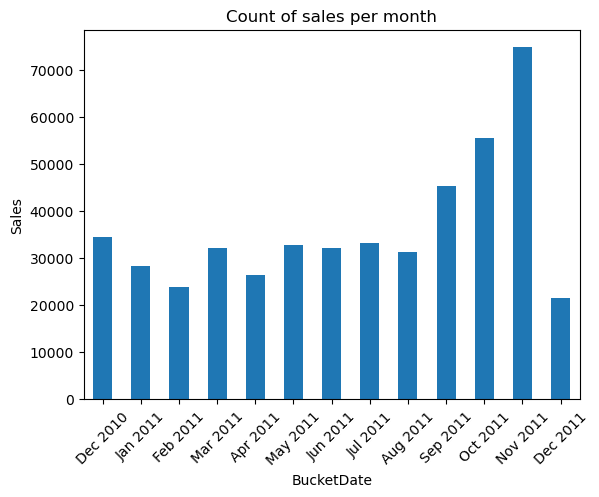

In [9]:
#Count of Sales per month in the super market
temp= df.groupby(pd.Grouper(key='BucketDate', freq='M'))['BucketID'].count()
temp.index = temp.index.strftime('%b %Y')
temp2 = temp.plot(kind='bar', title='Count of sales per month', rot=45)
temp2.set_ylabel('Sales')
temp2.plot()

In [10]:
# Single attribute : number unique buckets with BucketID
bid_counts = df['BucketID'].value_counts()
bid_counts.describe()

count    24627.000000
mean        19.162302
std         28.635400
min          1.000000
25%          2.000000
50%         11.000000
75%         24.000000
max        542.000000
Name: BucketID, dtype: float64

In [11]:
# rows with 0 sale
zero_sale = df['Sale'] == 0
df[zero_sale].count()

BucketID        1279
BucketDate      1279
Sale            1279
UserID            40
UserCountry     1279
ProductID       1279
ProductDescr     526
Quantity        1279
Amount          1279
dtype: int64

In [12]:
# rows with negative quantity
qty_less_0 = df['Quantity'] < 0
df[qty_less_0].count()

BucketID        9752
BucketDate      9752
Sale            9752
UserID          8905
UserCountry     9752
ProductID       9752
ProductDescr    9305
Quantity        9752
Amount          9752
dtype: int64

In [13]:
#count of rows where both Sale and Quantity are 0 and negative values respectively
df[zero_sale & qty_less_0].count()

BucketID        668
BucketDate      668
Sale            668
UserID            0
UserCountry     668
ProductID       668
ProductDescr    221
Quantity        668
Amount          668
dtype: int64

In [14]:
# drop rows
df.drop(df[qty_less_0].index, inplace=True)
df.drop(df[zero_sale].index, inplace=True)

count    4338.000000
mean       91.720839
std       228.785054
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: UserID, dtype: float64


Text(0, 0.5, 'Sales')

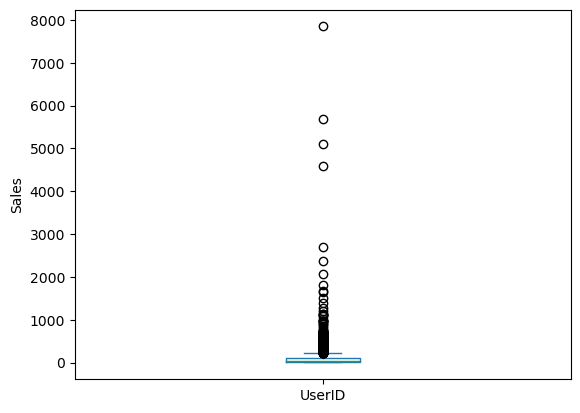

In [15]:
#Sales made by each user
user_count = df['UserID'].value_counts()
print(user_count.describe())
useridplot = user_count.plot.box()
useridplot.set_ylabel("Sales")

In [16]:
# drop rows
df.dropna(subset=['UserID'], inplace=True)
#Export data to update.csv
df.to_csv(r'update.csv', index=True, header=True)


In [17]:
#Pairwise correlation
df_corr = df.copy()
df_corr['ProductID'] = df_corr['ProductID'].astype('category').cat.codes
df_corr.sort_values(by=['ProductID'], inplace=True)
obj = {}
idx = 0
s = ""
for index, row in df_corr.iterrows():
    if row['ProductDescr'] != s:
        s = row['ProductDescr']
        obj[s] = idx
        idx += 1

In [18]:
df_corr['ProductDescr'].replace(obj, inplace=True)


In [19]:
df_corr['BucketID'] = df_corr['BucketID'].astype('category').cat.codes


In [20]:
df_corr['BucketDate'] = df_corr['BucketDate'].astype('category').cat.codes
df_corr['UserID'] = df_corr['UserID'].astype('category').cat.codes
df_corr['UserCountry'] = df_corr['UserCountry'].astype('category').cat.codes

<Axes: >

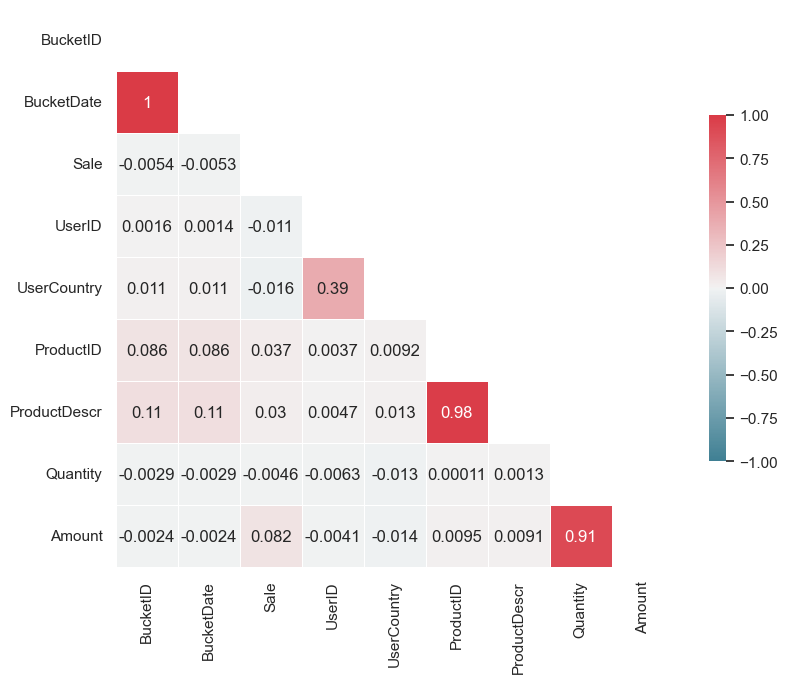

In [21]:
import seaborn as sns

correlation = df_corr.corr()
sns.set(style="white")
cover = np.zeros_like(correlation, dtype=bool)
cover[np.triu_indices_from(cover)] = True
plt.subplots(figsize=(9,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=cover, cmap=cmap,annot=True, vmax=1,vmin=-1,
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [22]:
# Aggregating data by UserID
df_user = df.groupby('UserID').agg(
    I=('ProductID', 'count'),
    Iu=('ProductID', 'nunique'))

# Grouping by UserID and BucketID to find maximum count per user
max_bucket_dates = df.groupby(['UserID', 'BucketID'])['BucketDate'].count().groupby('UserID').max()

# Assigning maximum count per user to the dataframe
df_user['Imax'] = max_bucket_dates


In [23]:
# Counting the number of unique BucketIDs per UserID
df_user['BucketNum'] = df.groupby('UserID')['BucketID'].nunique()


In [24]:
# Total and Average expenditure of customers
df_user['SumExp'] = df.groupby(['UserID', 'BucketID'])['Amount'].sum().groupby('UserID').sum()
df_user['AvgExp'] = df.groupby(['UserID', 'BucketID'])['Amount'].sum().groupby('UserID').mean()


In [25]:
df_user.describe()

I           Iu         Imax    BucketNum         SumExp  \
count  4338.000000  4338.000000  4338.000000  4338.000000    4338.000000   
mean     91.720839    61.501153    32.086445     4.272015    2054.270609   
std     228.785054    85.366768    31.243562     7.697998    8989.229895   
min       1.000000     1.000000     1.000000     1.000000       3.750000   
25%      17.000000    16.000000    13.000000     1.000000     307.415000   
50%      41.000000    35.000000    23.000000     2.000000     674.485000   
75%     100.000000    77.000000    42.000000     5.000000    1661.740000   
max    7847.000000  1787.000000   542.000000   209.000000  280206.020000   

             AvgExp  
count   4338.000000  
mean     419.167327  
std     1796.537828  
min        3.450000  
25%      178.625000  
50%      293.900000  
75%      430.113750  
max    84236.250000

<Axes: >

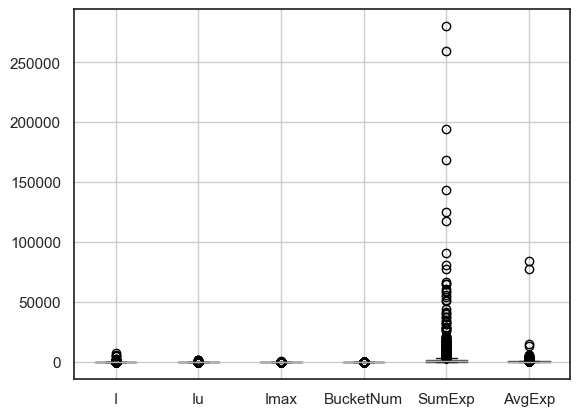

In [26]:
df_user.boxplot()

In [27]:
#Z-Score implementation to exclude outliers
from scipy.stats import zscore

# # Assuming 'UserID' is updated as 'User' and 'BucketID' as 'Bucket'
# df_user['User'] = df['UserID']
# df_user['Bucket'] = df['BucketID']

# Selecting numerical columns for z-score computation
num_cols = ['I', 'Iu', 'Imax', 'BucketNum', 'SumExp', 'AvgExp']

# Calculating z-scores for selected columns
z_scores = zscore(df_user[num_cols])

# Filtering the dataframe based on z-scores
threshold = 3
filtered_indices = (np.abs(z_scores) < threshold).all(axis=1)
extracted_dataset= df_user[filtered_indices]

# Saving the filtered dataframe to a CSV file
extracted_dataset.to_csv(r'extracted_dataset.csv', index=True, header=True)

# Describing the filtered dataframe
extracted_dataset.describe()


I           Iu         Imax    BucketNum        SumExp  \
count  4171.000000  4171.000000  4171.000000  4171.000000   4171.000000   
mean     70.315032    52.372812    28.871014     3.579238   1327.559716   
std      86.624853    53.545089    22.914839     3.794688   2058.227242   
min       1.000000     1.000000     1.000000     1.000000      3.750000   
25%      16.000000    15.000000    12.000000     1.000000    300.935000   
50%      39.000000    33.000000    23.000000     2.000000    640.760000   
75%      90.000000    71.000000    39.000000     4.000000   1521.170000   
max     756.000000   315.000000   125.000000    27.000000  28754.110000   

            AvgExp  
count  4171.000000  
mean    354.999266  
std     329.019302  
min       3.450000  
25%     176.802500  
50%     287.035000  
75%     417.920000  
max    4932.130000

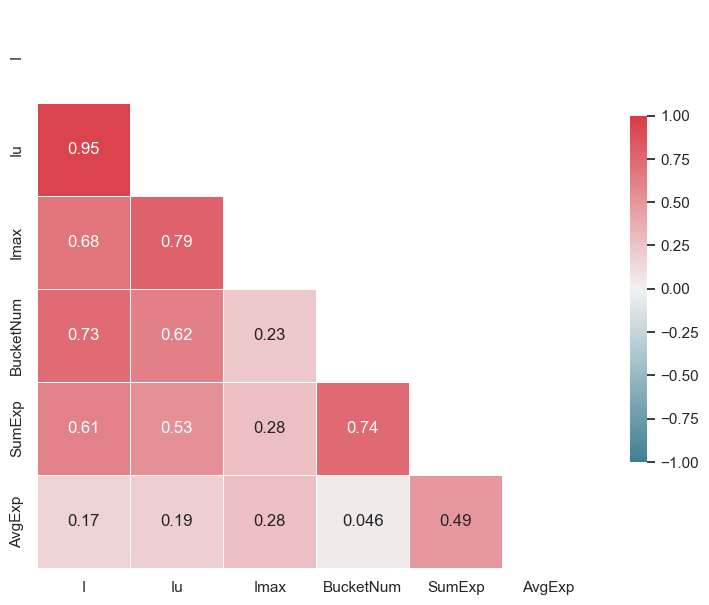

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix= extracted_dataset.corr()
cover = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(9, 9))
cormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=cover, cmap=cormap, annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()


In [29]:
## Cluster pre processing

In [30]:
extracted_dataset = pd.read_csv('extracted_dataset.csv', index_col=0, decimal='.')

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed_df = scaler.fit_transform(extracted_dataset.values)

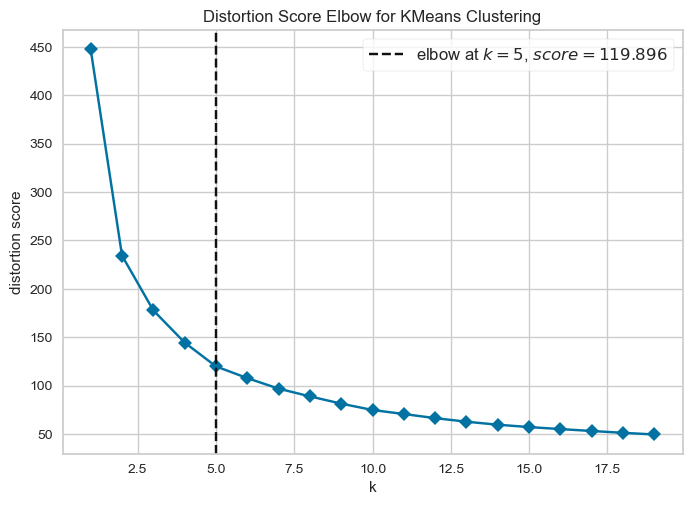

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
displayer = KElbowVisualizer(km, k=(1,20), metric='distortion', timings=False)
displayer.fit(transformed_df)
displayer.show()

In [34]:
num_clusters = displayer.elbow_value_
kmeans = KMeans(n_clusters=num_clusters, n_init=20, max_iter=100)
kmeans.fit(transformed_df)

histogram,bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))


In [35]:
dict(zip(bins,histogram))

{0: 2018, 1: 335, 2: 153, 3: 1195, 4: 470}

In [36]:
#Cluster Visualization - 2D (I & BucketNum)

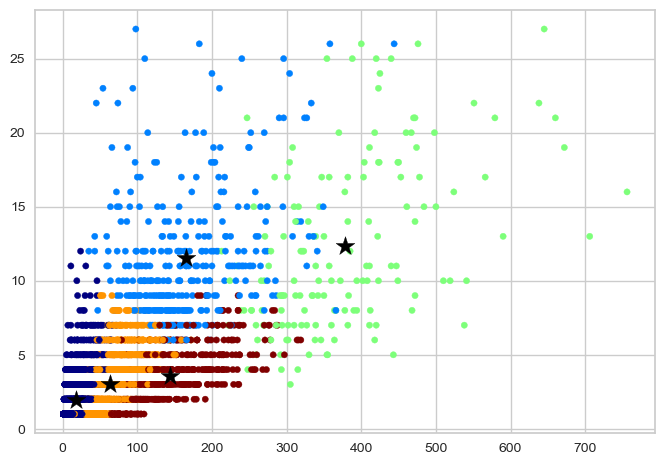

In [37]:
# Assuming 'scaler' is the fitted StandardScaler and 'kmeans' is the trained KMeans model
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a scatter plot of 'I' against 'BucketNum' with points colored by cluster labels
plt.scatter(extracted_dataset['I'],extracted_dataset['BucketNum'], c=kmeans.labels_, s=20, cmap='jet')

# Plot cluster centers over the scatter plot
plt.scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='black')

# Adjust plot settings
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [38]:
#Cluster Visualization - 3D (I & BucketNum & SumExp)

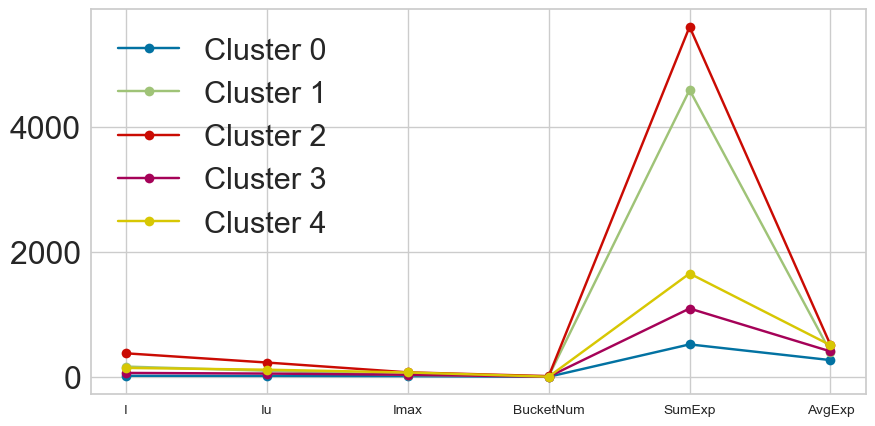

In [39]:
plt.figure(figsize=(10, 5))
p=0
for i in centers:
    plt.plot(i, marker='o', label='Cluster %s' % p)
    p+=1
plt.tick_params(axis='both', which='major', labelsize=23)
plt.xticks(range(0, len(extracted_dataset.columns)), extracted_dataset.columns, fontsize=10)
plt.legend(fontsize=22)
plt.show()

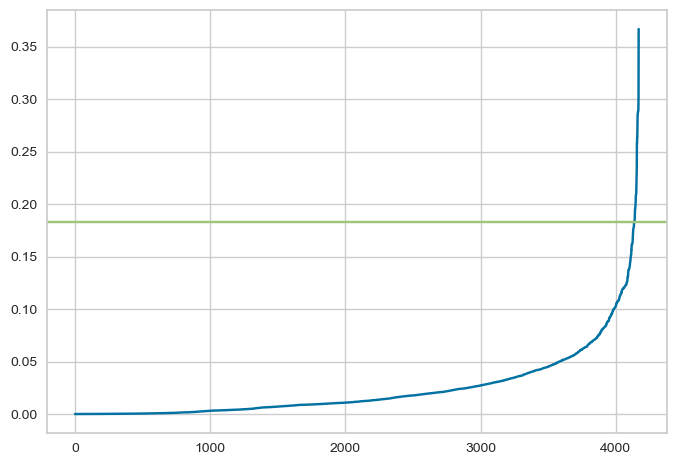

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
minimum=extracted_dataset.shape[1] * 2
pakkana = NearestNeighbors(n_neighbors=minimum)
pakkana_fit = pakkana.fit(transformed_df)
dhooram, indices = pakkana_fit.kneighbors(transformed_df)
dhooram = np.sort(dhooram, axis=0)
dhooram = dhooram[:,1]
kneedle = KneeLocator(range(dhooram.shape[0]),dhooram, S=1.0, curve="convex", direction="increasing")
plt.plot(range(dhooram.shape[0]),dhooram)
eps = kneedle.knee_y
plt.axhline(y=eps,color='g',linestyle='-', label="eps")
plt.show()

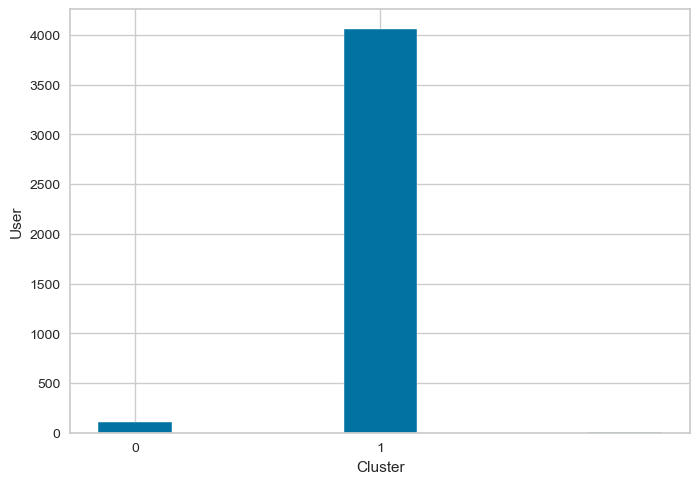

In [41]:
dbscan = DBSCAN(eps=eps, min_samples=minimum)
dbscan.fit(transformed_df)
sunil,mahi = np.unique(dbscan.labels_, return_counts=True)
plt.bar(x=range(len(mahi)), height=mahi, width=0.3)
plt.xticks(np.arange(2))
plt.xlabel("Cluster")
plt.ylabel("User")
plt.show()

In [42]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

def hierarchical_clustering(method, metric, data):
    # Calculate pairwise distances
    data_dist = pdist(data, metric=metric)
    data_link = linkage(data_dist, method=method, metric=metric)
    dendrogram(data_link, truncate_mode='lastp')
    max_distance = 0.7 * max(data_link[:, 2])
    assigned_clusters = fcluster(data_link, max_distance, criterion='distance')
    unique_clusters, cluster_counts = np.unique(assigned_clusters, return_counts=True)
    
    #return unique_clusters, cluster_counts

Single Linkage Hierarchical Clustering


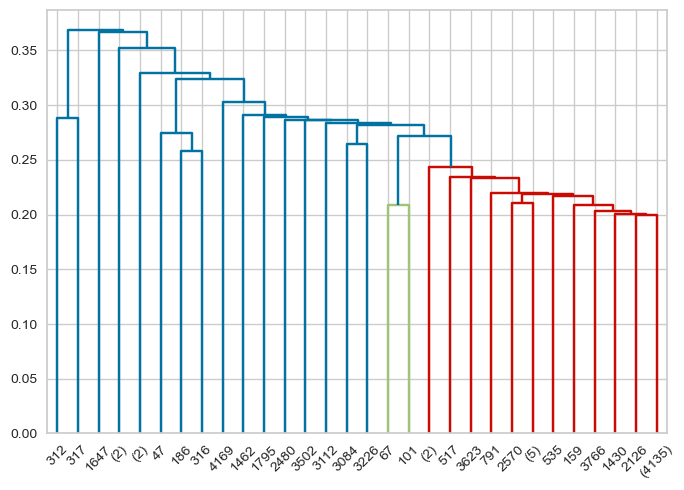

In [43]:
print("Single Linkage Hierarchical Clustering")
hierarchical_clustering(method='single', metric='euclidean', data=transformed_df)

Complete Linkage Hierarchical Clustering


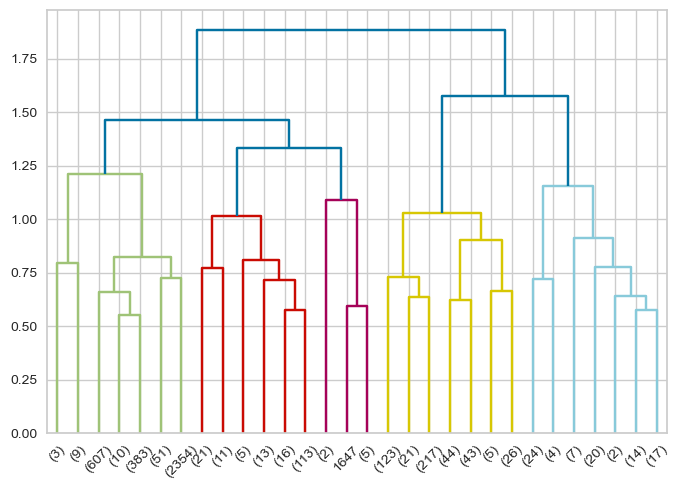

In [44]:
print("Complete Linkage Hierarchical Clustering")
hierarchical_clustering(method='complete', metric='euclidean', data=transformed_df)

In [45]:
# Auxilary Functions
from sklearn.model_selection import RandomizedSearchCV
def show_feature_importance(data, model):
    importance_values = model.feature_importances_
    feature_names = data.columns

    for name, importance in zip(feature_names, importance_values):
        print(f"Feature: {name}, Importance: {importance:.2f}")

    plt.figure()
    plt.title("Feature Importance")
    plt.bar(x=feature_names, height=importance_values, align="center")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.xticks(rotation=90)
    plt.show()

def printing(comb):
    print("--------------")
    for index, col in comb.iterrows():
        print(col['params'])
        print("ACC: {:.3f} \t F1: {:.3f}".format(col['accuracy'], col['f1_score']))

    print("--------------")

def run_hyperparameter_search(estimator, param_dist, features, target, n_iterations=50):
    search_accuracy = RandomizedSearchCV(estimator, param_distributions=param_dist,
                                         n_iter=n_iterations, n_jobs=10,
                                         scoring='accuracy')

    search_f1 = RandomizedSearchCV(estimator, param_distributions=param_dist,
                                   n_iter=n_iterations, n_jobs=10,
                                   scoring='f1_weighted')

    search_accuracy.fit(features, target)
    search_f1.fit(features, target)

    results_accuracy = pd.DataFrame(search_accuracy.cv_results_)
    results_accuracy.rename(columns={'mean_test_score': 'accuracy'}, inplace=True)
    results_accuracy['f1_score'] = search_f1.cv_results_['mean_test_score']

    results_accuracy.sort_values(by='accuracy', ascending=False, inplace=True)
    results_accuracy = results_accuracy[['params', 'accuracy', 'f1_score']]

    #printing(results_accuracy[:5])
    return search_accuracy.best_params_


In [46]:
#Load data
df = pd.read_csv('extracted_dataset.csv', index_col=0, decimal='.')

In [47]:
#Classification by high, low, medium spending
df.sort_values(by='SumExp', inplace=True)
temp=len(df)// 3
length=(len(df)// 3)*2
df['Label'] = "low"
df.loc[df.index[temp:length], 'Label'] = "medium"
df.loc[df.index[length:], 'Label'] = "high"

In [48]:
df.drop(columns=['Iu', 'Imax', 'SumExp', 'AvgExp'], axis=1, inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
target = df.pop('Label')
train_set, test_set, train_label, test_label = train_test_split(df, target, stratify=target, test_size=0.3, random_state=42)
train_label_cat = train_label.astype('category').cat.codes
test_label_cat = test_label.astype('category').cat.codes
print('Train set size: {} \nTest set size: {}'.format(len(train_set),len(test_set)))

Train set size: 2919 
Test set size: 1252


In [50]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from yellowbrick.classifier import classification_report as cr, confusion_matrix as cm

def display_scores(classifier, test_predictions, show_feature=True, show_confusion_matrix=True):

    # Show feature importance
    if show_feature:
        show_feature_importance(df, classifier)
        print('\n')
    scores = cross_validate(classifier, train_set, train_label, cv=3, return_train_score= True, scoring='accuracy')

    print('Average Fit Time: ', statistics.mean(scores['fit_time']))
    print('Average Score Time: ', statistics.mean(scores['score_time']))
    print('Average Train Score: ', statistics.mean(scores['train_score']))
    print('Average Test Score: ', statistics.mean(scores['test_score']))
    print('\n')

    # Define classes for the confusion matrix and classification report
    class_labels = ['high', 'low', 'medium']

    # Show confusion matrix
    if show_confusion_matrix:
        cm(classifier, train_set, train_label, test_set, test_label,classes=class_labels)
        plt.tight_layout()


Average Fit Time:  0.006655136744181315
Average Score Time:  0.004592339197794597
Average Train Score:  0.6522781774580335
Average Test Score:  0.6522781774580335




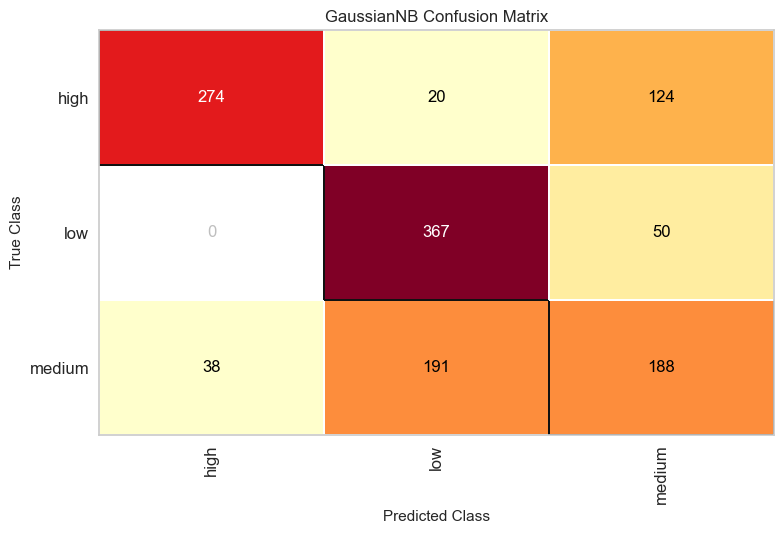

<Figure size 800x550 with 0 Axes>

In [51]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

naive_bayes.fit(train_set, train_label)

predictions_nb = naive_bayes.predict(test_set)

display_scores(naive_bayes, predictions_nb, show_feature=False)


In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

params = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None],
          "min_samples_split": sp_randint(3, 30),
          "min_samples_leaf": sp_randint(1, 40),
          "splitter": ["best", "random"]}

classifier = DecisionTreeClassifier()
best_params = run_hyperparameter_search(classifier, params, train_set, train_label)

Feature: I, Importance: 0.39
Feature: BucketNum, Importance: 0.61


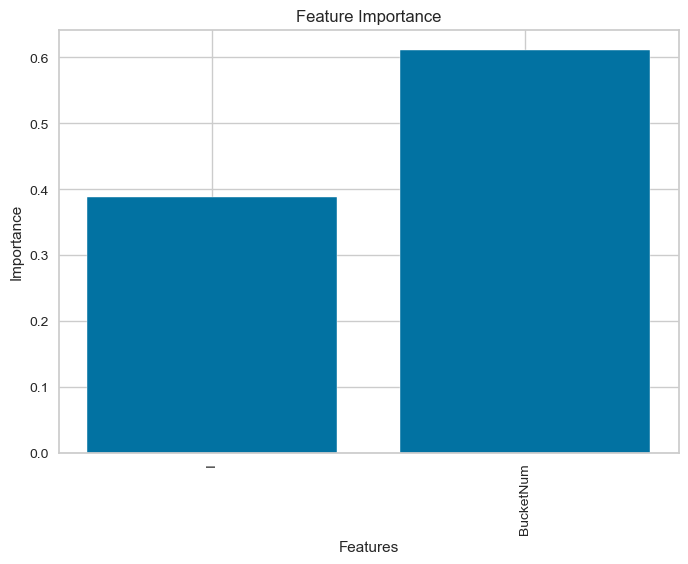



Average Fit Time:  0.006876071294148763
Average Score Time:  0.005232969919840495
Average Train Score:  0.7449468996231586
Average Test Score:  0.7358684480986639




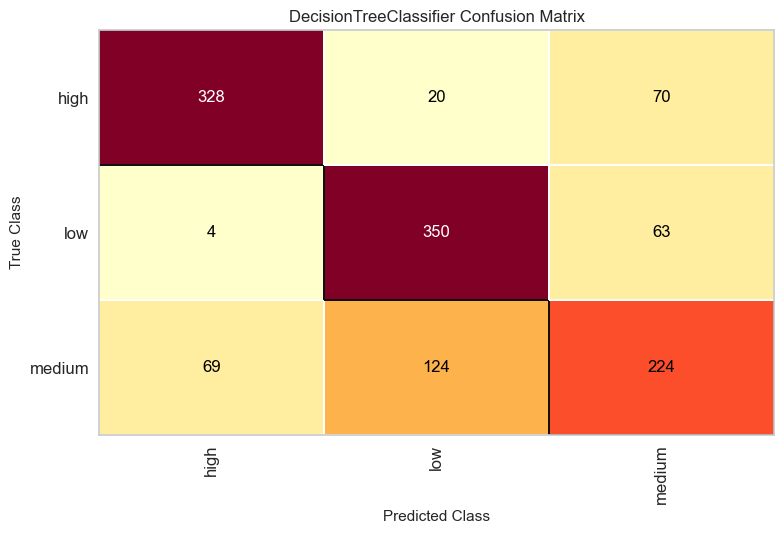

<Figure size 800x550 with 0 Axes>

In [53]:
dectre= DecisionTreeClassifier(**best_params)
dectre = dectre.fit(train_set, train_label)
pre_dectre = dectre.predict(test_set)
display_scores(dectre,pre_dectre)

Feature: I, Importance: 0.51
Feature: BucketNum, Importance: 0.49


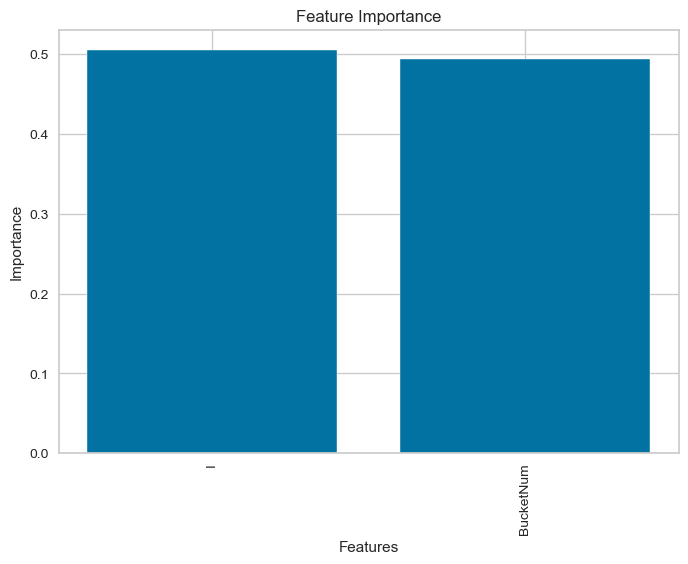



Average Fit Time:  0.4165185292561849
Average Score Time:  0.05646069844563802
Average Train Score:  0.7483727303871188
Average Test Score:  0.7389516957862281




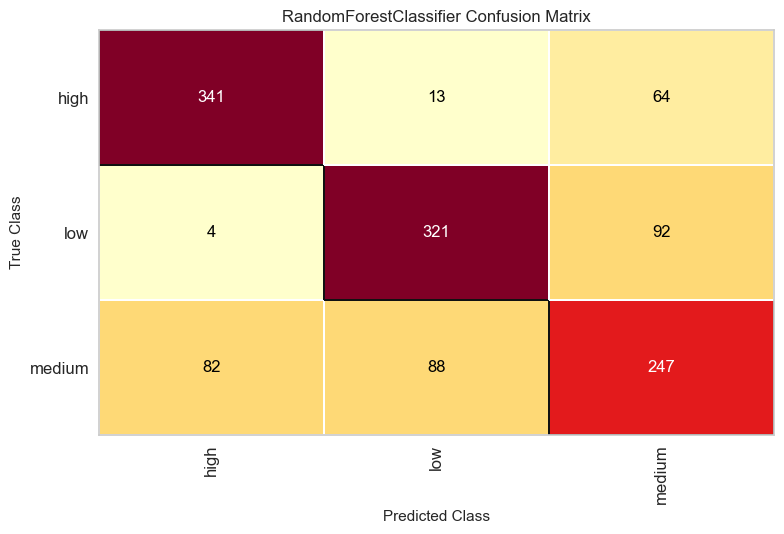

<Figure size 800x550 with 0 Axes>

In [54]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
param_dist = {"n_estimators": [30,50,100,300,500,750,1000],
              "max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_set.iloc[0]) + 1),
              "min_samples_split": sp_randint(3, 30),
              "min_samples_leaf": sp_randint(4, 30),
              "bootstrap": [True, False],
              "class_weight":['balanced', None]}

clusterf = RandomForestClassifier()
best_params = run_hyperparameter_search(clusterf, param_dist, train_set, train_label)
randfor = RandomForestClassifier(**best_params)
randfor = randfor.fit(train_set, train_label)
pred_randfor = randfor.predict(test_set)
display_scores(randfor,pred_randfor)

Text(0, 0.5, 'Error Rate')

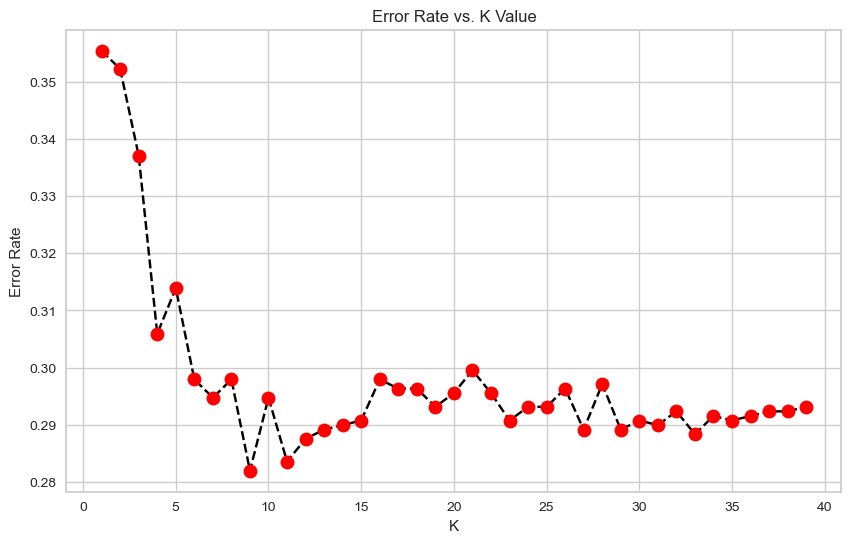

In [55]:
from sklearn.neighbors import KNeighborsClassifier
rate_e= []
i=1
while(i<40):
    k=KNeighborsClassifier(n_neighbors=i, algorithm='auto')
    k=k.fit(train_set, train_label)
    ed =k.predict(test_set)
    rate_e.append(np.mean(ed != test_label))
    i+=1
plt.figure(figsize=(10,6))
plt.plot(range(1,40),rate_e, color='black', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Average Fit Time:  0.0
Average Score Time:  0.06769935290018718
Average Train Score:  0.7523124357656732
Average Test Score:  0.7136005481329222




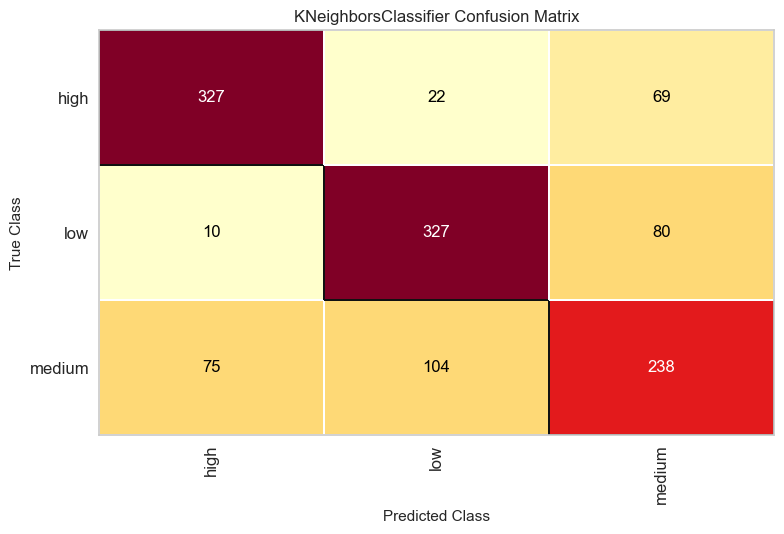

<Figure size 800x550 with 0 Axes>

In [56]:
k=KNeighborsClassifier(n_neighbors=12, algorithm='auto')
k=k.fit(train_set, train_label)
k_pred=k.predict(test_set)
display_scores(k,k_pred,show_feature=False)

Average Fit Time:  3.2292102177937827
Average Score Time:  0.08212486902872722
Average Train Score:  0.724049331963001
Average Test Score:  0.7242206235011991




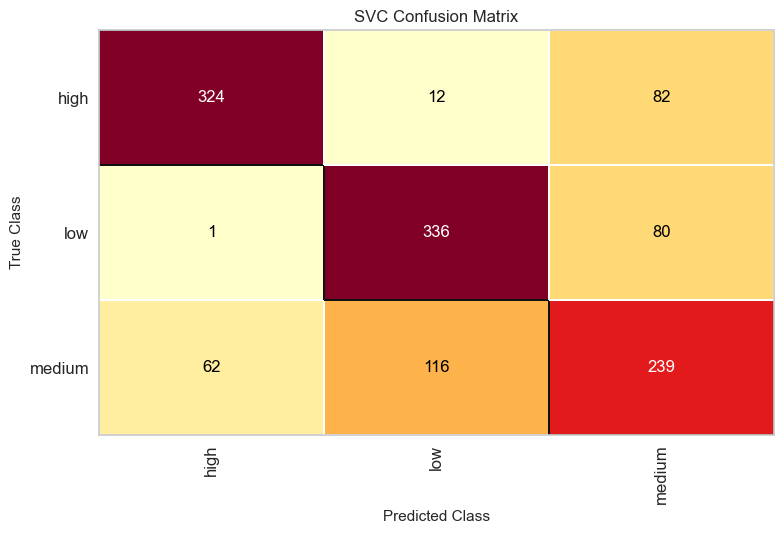

<Figure size 800x550 with 0 Axes>

In [57]:
from sklearn.svm import SVC
p_dist={"kernel": ['linear', 'poly', 'rbf', 'sigmoid']}
clusterf=SVC()
b_p=run_hyperparameter_search(clusterf, p_dist, train_set, train_label)

svm=SVC( **b_p)
svm=svm.fit(train_set, train_label)
svm_p=svm.predict(test_set)
display_scores(svm,svm_p,show_feature=False)